In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import pandas as pd

In [5]:
train_csv = '/content/drive/MyDrive/Hand Written Digit Classification/mnist_train.csv'
train_data = pd.read_csv(train_csv)

train_labels = train_data.iloc[:, 0].values
train_images = train_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1)

train_images = train_images / 255.0

In [6]:
test_csv = '/content/drive/MyDrive/Hand Written Digit Classification/mnist_test.csv'
test_data = pd.read_csv(test_csv)

test_labels = test_data.iloc[:, 0].values
test_images = test_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1)

test_images = test_images / 255.0

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 66970

In [14]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3031 - accuracy: 0.9067
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1695 - accuracy: 0.9502
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1451 - accuracy: 0.9571
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1282 - accuracy: 0.9614
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1217 - accuracy: 0.9636
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1106 - accuracy: 0.9675
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1064 - accuracy: 0.9691
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1015 - accuracy: 0.9691
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0958 - accuracy: 0.9721
Epoch 10/10
1875/1875 [==============================] - 42s 22m

In [21]:
checkpoint_callback = ModelCheckpoint('./content/drive/MyDrive/Saved_Models/DigitClassification99.08.h5', monitor='val_accuracy', save_best_only=True, mode='max')

In [22]:
model.fit(train_images,train_labels,validation_split=0.2,epochs=10,batch_size=512,callbacks=[checkpoint_callback],verbose=1)

Epoch 1/10
94/94 [==============================] - 7s 59ms/step - loss: 0.5644 - accuracy: 0.8259 - val_loss: 0.1908 - val_accuracy: 0.9440
Epoch 2/10
 1/94 [..............................] - ETA: 4s - loss: 0.2956 - accuracy: 0.9180

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94/94 [==============================] - 7s 74ms/step - loss: 0.2246 - accuracy: 0.9333 - val_loss: 0.1334 - val_accuracy: 0.9616
Epoch 3/10
94/94 [==============================] - 7s 71ms/step - loss: 0.1629 - accuracy: 0.9504 - val_loss: 0.1105 - val_accuracy: 0.9668
Epoch 4/10
94/94 [==============================] - 7s 78ms/step - loss: 0.1345 - accuracy: 0.9595 - val_loss: 0.0984 - val_accuracy: 0.9702
Epoch 5/10
94/94 [==============================] - 8s 85ms/step - loss: 0.1114 - accuracy: 0.9659 - val_loss: 0.0885 - val_accuracy: 0.9732
Epoch 6/10
94/94 [==============================] - 5s 54ms/step - loss: 0.0989 - accuracy: 0.9692 - val_loss: 0.0897 - val_accuracy: 0.9737
Epoch 7/10
94/94 [==============================] - 6s 63ms/step - loss: 0.0866 - accuracy: 0.9721 - val_loss: 0.0798 - val_accuracy: 0.9763
Epoch 8/10
94/94 [==============================] - 6s 67ms/step - loss: 0.0780 - accuracy: 0.9759 - val_loss: 0.0764 - val_accuracy: 0.9766
Epoch 9/10
94/94 [======

In [23]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0695 - accuracy: 0.9787


0.9786999821662903

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(train_images,train_labels,validation_split=0.2,epochs=20,batch_size=512,callbacks=[checkpoint_callback],verbose=1)

Epoch 1/20
94/94 [==============================] - 43s 445ms/step - loss: 0.5935 - accuracy: 0.8197 - val_loss: 0.1252 - val_accuracy: 0.9635
Epoch 2/20
94/94 [==============================] - 40s 428ms/step - loss: 0.1548 - accuracy: 0.9546 - val_loss: 0.0808 - val_accuracy: 0.9748
Epoch 3/20
94/94 [==============================] - 42s 447ms/step - loss: 0.1131 - accuracy: 0.9657 - val_loss: 0.0631 - val_accuracy: 0.9808
Epoch 4/20
94/94 [==============================] - 42s 443ms/step - loss: 0.0869 - accuracy: 0.9741 - val_loss: 0.0544 - val_accuracy: 0.9844
Epoch 5/20
94/94 [==============================] - 39s 411ms/step - loss: 0.0761 - accuracy: 0.9774 - val_loss: 0.0489 - val_accuracy: 0.9852
Epoch 6/20
94/94 [==============================] - 44s 466ms/step - loss: 0.0652 - accuracy: 0.9813 - val_loss: 0.0447 - val_accuracy: 0.9872
Epoch 7/20
94/94 [==============================] - 40s 421ms/step - loss: 0.0577 - accuracy: 0.9826 - val_loss: 0.0419 - val_accuracy: 0.9883

In [27]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
test_acc

313/313 [==============================] - 4s 12ms/step - loss: 0.0243 - accuracy: 0.9926


0.9926000237464905

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)


313/313 [==============================] - 5s 14ms/step


In [29]:
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print(f'F1 Score: {f1}')

conf_matrix = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Generate a classification report
report = classification_report(true_classes, predicted_classes)
print('Classification Report:')
print(report)


F1 Score: 0.992595844333099
Confusion Matrix:
[[ 975    1    0    0    0    0    2    1    1    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   0    0 1030    0    1    0    0    1    0    0]
 [   0    0    1 1004    0    4    0    0    1    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   2    0    0    6    0  880    1    1    1    1]
 [   2    2    0    0    3    4  947    0    0    0]
 [   0    3    5    0    0    0    0 1016    1    3]
 [   2    0    1    2    0    0    0    2  965    2]
 [   1    1    0    0    5    4    0    2    1  995]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.

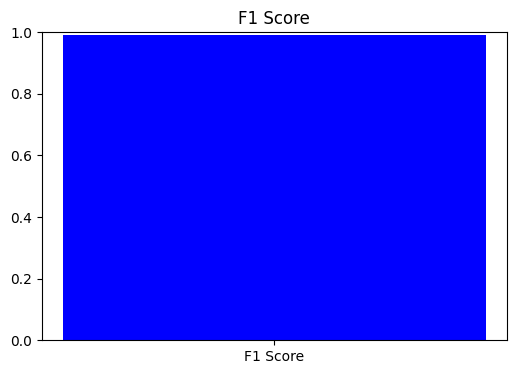

In [30]:
plt.figure(figsize=(6, 4))
plt.bar(['F1 Score'], [f1], color='blue')
plt.ylim(0, 1)
plt.title('F1 Score')
plt.show()

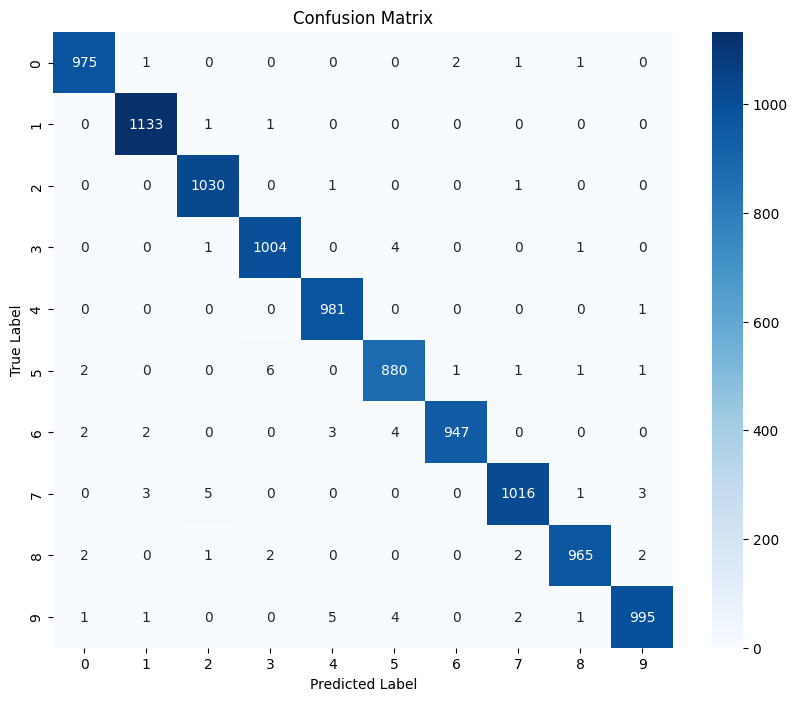

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 23ms/step



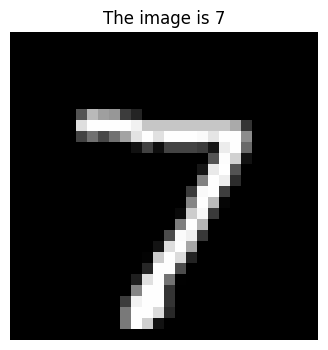

In [45]:
image = test_images[0].reshape(1,28, 28,1)
prediction = model.predict(image)
image = image.reshape(28, 28)
# Visualize the first image
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title(f'The image is {prediction.argmax()}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 40ms/step


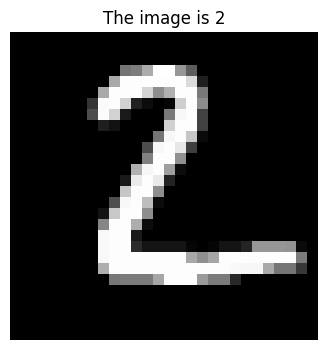

In [46]:
image = test_images[1].reshape(1,28, 28,1)
prediction = model.predict(image)
image = image.reshape(28, 28)
# Visualize the first image
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title(f'The image is {prediction.argmax()}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 68ms/step


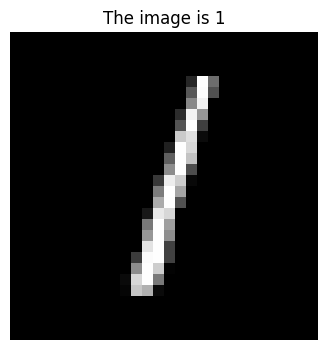

In [47]:
image = test_images[2].reshape(1,28, 28,1)
prediction = model.predict(image)
image = image.reshape(28, 28)
# Visualize the first image
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title(f'The image is {prediction.argmax()}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 36ms/step


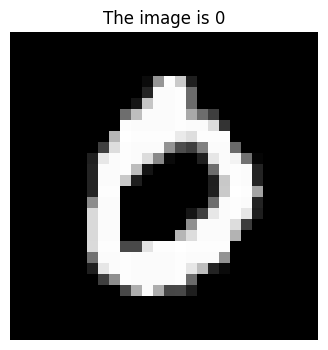

In [48]:
image = test_images[3].reshape(1,28, 28,1)
prediction = model.predict(image)
image = image.reshape(28, 28)
# Visualize the first image
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title(f'The image is {prediction.argmax()}')
plt.axis('off')
plt.show()